In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [2]:
data_filename = '/Users/kellydouglass/Desktop/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt'

data = Table.read(data_filename, format='ascii.commented_header')

In [4]:
kias_filename = '/Users/kellydouglass/Documents/Research/data/kias1033_5_MPAJHU_ZdustOS_HI100_NSAv012_CMDJan2020.txt'

kias = Table.read(kias_filename, format='ascii.commented_header')

In [5]:
bad_boolean = data['curve_used'] == -99

good_galaxies = data[~bad_boolean]

In [6]:
HI_boolean = np.logical_or(good_galaxies['logHI'] == -99, good_galaxies['logHI'] == -999)

goodHI_galaxies = good_galaxies[~HI_boolean]

### Calculate mass ratios

In [7]:
good_galaxies['Mtot_Mstar_ratio'] = good_galaxies['Mtot']/good_galaxies['Mstar']
good_galaxies['Mtot_MstarNSA_ratio'] = good_galaxies['Mtot']/good_galaxies['NSA_Mstar']
goodHI_galaxies['Mtot_Mstar_ratio'] = goodHI_galaxies['Mtot']/goodHI_galaxies['Mstar']
goodHI_galaxies['Mtot_MstarNSA_ratio'] = goodHI_galaxies['Mtot']/goodHI_galaxies['NSA_Mstar']

goodHI_galaxies['Mtot_MstarHI_ratio'] = goodHI_galaxies['Mtot']/(goodHI_galaxies['Mstar'] + 10**goodHI_galaxies['logHI'])
goodHI_galaxies['Mtot_MstarNSAHI_ratio'] = goodHI_galaxies['Mtot']/(goodHI_galaxies['NSA_Mstar'] + 10**goodHI_galaxies['logHI'])

In [8]:
BC_boolean = good_galaxies['CMD_class'] == 1
GV_boolean = good_galaxies['CMD_class'] == 2
RS_boolean = good_galaxies['CMD_class'] == 3

BC = good_galaxies[BC_boolean]
GV = good_galaxies[GV_boolean]
RS = good_galaxies[RS_boolean]

In [9]:
BC_HI_boolean = goodHI_galaxies['CMD_class'] == 1
GV_HI_boolean = goodHI_galaxies['CMD_class'] == 2
RS_HI_boolean = goodHI_galaxies['CMD_class'] == 3

BC_HI = goodHI_galaxies[BC_HI_boolean]
GV_HI = goodHI_galaxies[GV_HI_boolean]
RS_HI = goodHI_galaxies[RS_HI_boolean]

In [10]:
kias_BC_boolean = kias['CMD_class'] == 1
kias_GV_boolean = kias['CMD_class'] == 2
kias_RS_boolean = kias['CMD_class'] == 3

kias_BC = kias[kias_BC_boolean]
kias_GV = kias[kias_GV_boolean]
kias_RS = kias[kias_RS_boolean]

# Distribution in maximum radius probed, $R_\text{max}$

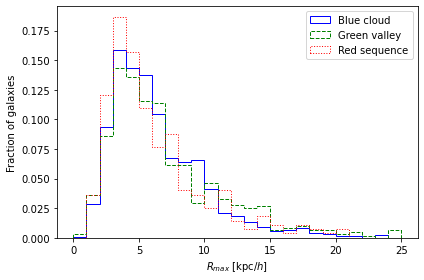

In [8]:
plt.figure()

Rmax_bins = np.linspace(0,25,26)

plt.hist(BC['Rmax'], bins=Rmax_bins, density=True, histtype='step', color='b', label='Blue cloud')
plt.hist(GV['Rmax'], bins=Rmax_bins, density=True, histtype='step', color='g', linestyle='--', label='Green valley')
plt.hist(RS['Rmax'], bins=Rmax_bins, density=True, histtype='step', color='r', linestyle=':', label='Red sequence')

plt.xlabel('$R_{max}$ [kpc/$h$]')
plt.ylabel('Fraction of galaxies')

plt.legend()

plt.tight_layout();

# Relationship between $M_*$ and $M_\text{tot}$

In [41]:
def bin_median(data, bin_quantity, bins, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin_quantity : string
        Name of column in data by which to bin the data
        
    bins : ndarray of shape (n,)
        Array of bin edges
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Median values of median_quantity for each bin of bin_quantity
        
    binned_err : ndarray of shape (n,)
        Statistical uncertainty in each bin (1/sqrt(N), where N is the number of 
        objects in the bin)
    '''
    
    if bin_quantity in ['Mstar', 'NSA_Mstar', 'Mstar_NSA']:
        bin_indices = np.digitize(np.log10(data[bin_quantity]), bins)
    else:
        bin_indices = np.digitize(data[bin_quantity], bins)
    
    n_bins = len(bins)
    
    binned_median = np.zeros(n_bins)
    binned_err = np.zeros(n_bins)
    
    for i in range(n_bins):
        # Find galaxies in this bin
        gal_in_bin = bin_indices == i
        
        # Calculate median of galaxies in bin
        if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot', 'Mstar_NSA']:
            binned_median[i] = np.log10(np.nanmedian(data[median_quantity][gal_in_bin]))
        else:
            binned_median[i] = np.nanmedian(data[median_quantity][gal_in_bin])
        
        # Calculate statistical uncertainty in bin
        binned_err[i] = 1/np.sqrt(sum(gal_in_bin))
        
    return binned_median, binned_err

In [10]:
Mstar_bins = np.linspace(8.5,12,9)
Mstar_bin_width = Mstar_bins[1] - Mstar_bins[0]

BC_Mtot_medians, BC_Mtot_errs = bin_median(BC, 'Mstar', Mstar_bins, 'Mtot')
GV_Mtot_medians, GV_Mtot_errs = bin_median(GV, 'Mstar', Mstar_bins, 'Mtot')
RS_Mtot_medians, RS_Mtot_errs = bin_median(RS, 'Mstar', Mstar_bins, 'Mtot')

BC_MtotNSA_medians, BC_MtotNSA_errs = bin_median(BC, 'NSA_Mstar', Mstar_bins, 'Mtot')
GV_MtotNSA_medians, GV_MtotNSA_errs = bin_median(GV, 'NSA_Mstar', Mstar_bins, 'Mtot')
RS_MtotNSA_medians, RS_MtotNSA_errs = bin_median(RS, 'NSA_Mstar', Mstar_bins, 'Mtot')

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


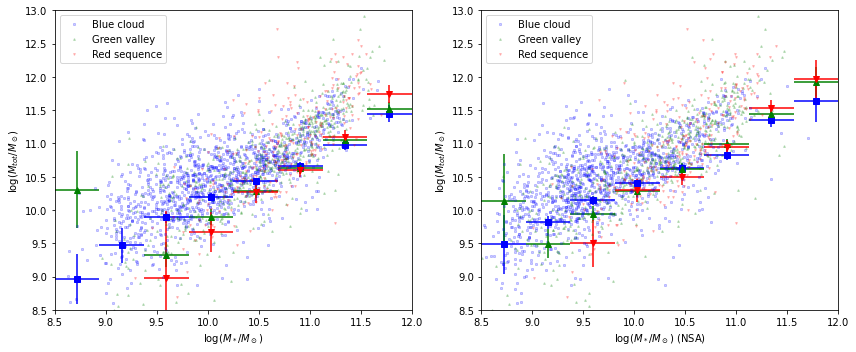

In [11]:
plt.figure(figsize=(12,5))

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.subplot(121)
plt.plot(np.log10(BC['Mstar']), np.log10(BC['Mtot']), 'bs', markersize=2, alpha=0.2, label='Blue cloud')
plt.plot(np.log10(GV['Mstar']), np.log10(GV['Mtot']), 'g^', markersize=2, alpha=0.2, label='Green valley')
plt.plot(np.log10(RS['Mstar']), np.log10(RS['Mtot']), 'rv', markersize=2, alpha=0.2, label='Red sequence')

plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, BC_Mtot_medians, 
             xerr=0.5*Mstar_bin_width, yerr=BC_Mtot_errs, 
             c='b', fmt='s')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, GV_Mtot_medians, 
             xerr=0.5*Mstar_bin_width, yerr=GV_Mtot_errs, 
             c='g', fmt='^')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, RS_Mtot_medians, 
             xerr=0.5*Mstar_bin_width, yerr=RS_Mtot_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_*/M_\odot$)')
plt.ylabel('log($M_{tot}/M_\odot$)')

plt.xlim([8.5,12])
plt.ylim([8.5,13])

plt.legend()
################################################################################


################################################################################
# NSA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.plot(np.log10(BC['NSA_Mstar']), np.log10(BC['Mtot']), 'bs', markersize=2, 
         alpha=0.2, label='Blue cloud')
plt.plot(np.log10(GV['NSA_Mstar']), np.log10(GV['Mtot']), 'g^', markersize=2, 
         alpha=0.2, label='Green valley')
plt.plot(np.log10(RS['NSA_Mstar']), np.log10(RS['Mtot']), 'rv', markersize=2, 
         alpha=0.2, label='Red sequence')

plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, BC_MtotNSA_medians, 
             xerr=0.5*Mstar_bin_width, yerr=BC_MtotNSA_errs, 
             c='b', fmt='s')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, GV_MtotNSA_medians, 
             xerr=0.5*Mstar_bin_width, yerr=GV_MtotNSA_errs, 
             c='g', fmt='^')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, RS_MtotNSA_medians, 
             xerr=0.5*Mstar_bin_width, yerr=RS_MtotNSA_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_*/M_\odot$) (NSA)')
plt.ylabel('log($M_{tot}/M_\odot$)')

plt.xlim([8.5,12])
plt.ylim([8.5,13])

plt.legend()
################################################################################
plt.tight_layout();

# Relationship between $M_*$ and $M_{HI}$

In [42]:
BC_HI_medians, BC_HI_errs = bin_median(BC_HI, 'Mstar', Mstar_bins, 'logHI')
GV_HI_medians, GV_HI_errs = bin_median(GV_HI, 'Mstar', Mstar_bins, 'logHI')
RS_HI_medians, RS_HI_errs = bin_median(RS_HI, 'Mstar', Mstar_bins, 'logHI')

BC_NSA_HI_medians, BC_NSA_HI_errs = bin_median(BC_HI, 'NSA_Mstar', Mstar_bins, 'logHI')
GV_NSA_HI_medians, GV_NSA_HI_errs = bin_median(GV_HI, 'NSA_Mstar', Mstar_bins, 'logHI')
RS_NSA_HI_medians, RS_NSA_HI_errs = bin_median(RS_HI, 'NSA_Mstar', Mstar_bins, 'logHI')

kias_BC_NSA_HI_medians, kias_BC_NSA_HI_errs = bin_median(kias_BC, 'Mstar_NSA', Mstar_bins, 'HImass')
kias_GV_NSA_HI_medians, kias_GV_NSA_HI_errs = bin_median(kias_GV, 'Mstar_NSA', Mstar_bins, 'HImass')
kias_RS_NSA_HI_medians, kias_RS_NSA_HI_errs = bin_median(kias_RS, 'Mstar_NSA', Mstar_bins, 'HImass')

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


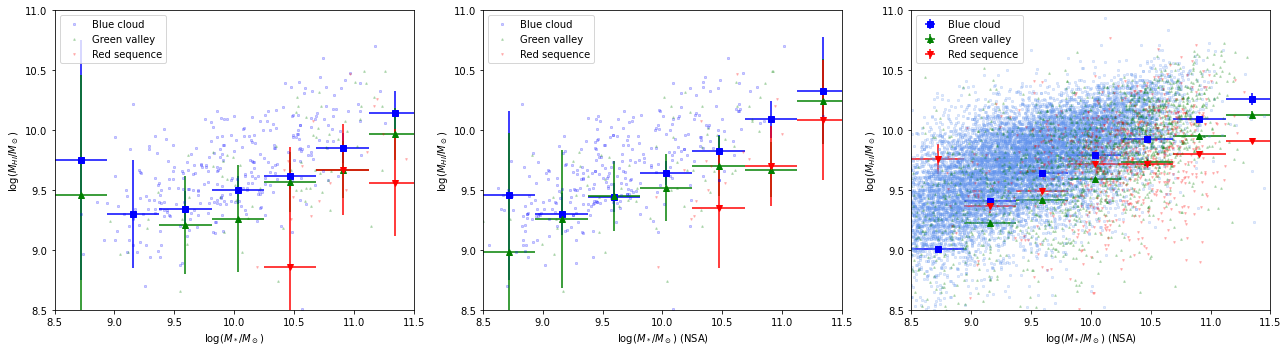

In [48]:
plt.figure(figsize=(18,5))

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.subplot(131)
plt.plot(np.log10(BC_HI['Mstar']), BC_HI['logHI'], 'bs', markersize=2, 
         alpha=0.2, label='Blue cloud')
plt.plot(np.log10(GV_HI['Mstar']), GV_HI['logHI'], 'g^', markersize=2, 
         alpha=0.2, label='Green valley')
plt.plot(np.log10(RS_HI['Mstar']), RS_HI['logHI'], 'rv', markersize=2, 
         alpha=0.2, label='Red sequence')

plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, BC_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=BC_HI_errs, 
             c='b', fmt='s')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, GV_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=GV_HI_errs, 
             c='g', fmt='^')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, RS_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=RS_HI_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_*/M_\odot$)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8.5,11.5])
plt.ylim([8.5,11])

plt.legend()
################################################################################


################################################################################
# NSA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(132)
plt.plot(np.log10(BC_HI['NSA_Mstar']), BC_HI['logHI'], 'bs', markersize=2, 
         alpha=0.2, label='Blue cloud')
plt.plot(np.log10(GV_HI['NSA_Mstar']), GV_HI['logHI'], 'g^', markersize=2, 
         alpha=0.2, label='Green valley')
plt.plot(np.log10(RS_HI['NSA_Mstar']), RS_HI['logHI'], 'rv', markersize=2, 
         alpha=0.2, label='Red sequence')

plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, BC_NSA_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=BC_NSA_HI_errs, 
             c='b', fmt='s')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, GV_NSA_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=GV_NSA_HI_errs, 
             c='g', fmt='^')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, RS_NSA_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=RS_NSA_HI_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_*/M_\odot$) (NSA)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8.5,11.5])
plt.ylim([8.5,11])

plt.legend()
################################################################################


################################################################################
# SDSS DR7
#-------------------------------------------------------------------------------
plt.subplot(133)
plt.plot(np.log10(kias_BC['Mstar_NSA']), kias_BC['HImass'], 's', color='CornflowerBlue', markersize=2, 
         alpha=0.2)
plt.plot(np.log10(kias_GV['Mstar_NSA']), kias_GV['HImass'], 'g^', markersize=2, 
         alpha=0.2)
plt.plot(np.log10(kias_RS['Mstar_NSA']), kias_RS['HImass'], 'rv', markersize=2, 
         alpha=0.2)

plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, kias_BC_NSA_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=kias_BC_NSA_HI_errs, 
             c='b', fmt='s', label='Blue cloud')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, kias_GV_NSA_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=kias_GV_NSA_HI_errs, 
             c='g', fmt='^', label='Green valley')
plt.errorbar(Mstar_bins + 0.5*Mstar_bin_width, kias_RS_NSA_HI_medians, 
             xerr=0.5*Mstar_bin_width, yerr=kias_RS_NSA_HI_errs, 
             c='r', fmt='v', label='Red sequence')

plt.xlabel('log($M_*/M_\odot$) (NSA)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8.5,11.5])
plt.ylim([8.5,11])

plt.legend()
################################################################################

plt.tight_layout();

# Distribution in mass ratios

In [16]:
def hist_norm(data, bins):
    '''
    Return the values to plot a normalized histogram.
    
    
    PARAMETERS
    ==========
    
    data : column of astropy table
        Data to be binned
        
    bins : ndarray of shape (n,)
        Bin edges
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Number of objects in each bin, normalized by the total number of 
        objects in the sample
        
    binned_data_err : ndarray of shape (n,)
        Statistical uncertainty in the count in each bin.
    '''
    
    # Bin data
    counts,_ = np.histogram(data, bins=bins)
    
    # Normalize binned data
    binned_data = counts/len(data)
    
    # Calculate uncertainty in each bin
    binned_data_err = 1/(np.sqrt(counts)*len(data))
    
    return binned_data, binned_data_err

In [25]:
mass_bins = np.linspace(0,10,41)
mass_bin_width = mass_bins[1] - mass_bins[0]

BC_MtotMstar_binned, BC_MtotMstar_err = hist_norm(BC['Mtot_Mstar_ratio'], bins=mass_bins)
GV_MtotMstar_binned, GV_MtotMstar_err = hist_norm(GV['Mtot_Mstar_ratio'], bins=mass_bins)
RS_MtotMstar_binned, RS_MtotMstar_err = hist_norm(RS['Mtot_Mstar_ratio'], bins=mass_bins)

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


### $M_\text{tot}/M_*$

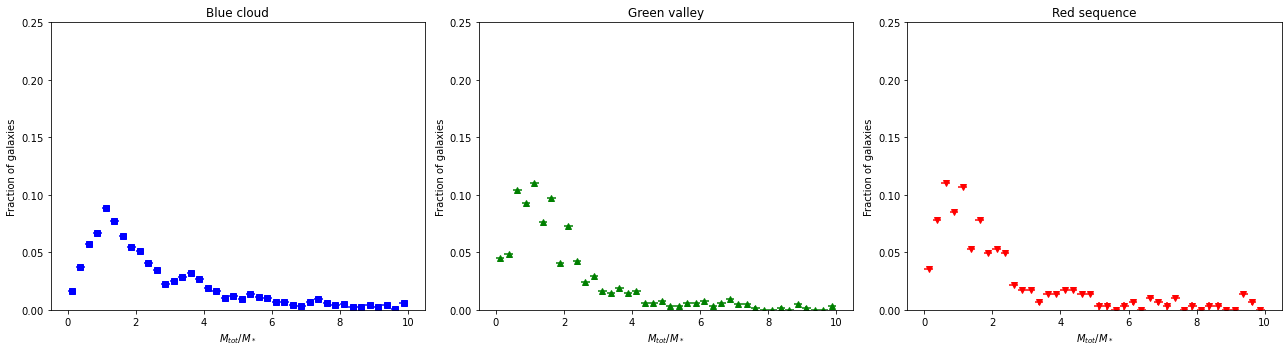

In [26]:
plt.figure(figsize=(18,5))

################################################################################
# Blue cloud
#-------------------------------------------------------------------------------
plt.subplot(131)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, BC_MtotMstar_binned, 
             xerr=0.5*mass_bin_width, yerr=BC_MtotMstar_err, fmt='bs')

plt.ylim(0,0.25)

plt.xlabel('$M_{tot}/M_*$')
plt.ylabel('Fraction of galaxies')

plt.title('Blue cloud')
################################################################################


################################################################################
# Green valley
#-------------------------------------------------------------------------------
plt.subplot(132)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, GV_MtotMstar_binned, 
             xerr=0.5*mass_bin_width, yerr=GV_MtotMstar_err, fmt='g^')

plt.ylim(0,0.25)

plt.xlabel('$M_{tot}/M_*$')
plt.ylabel('Fraction of galaxies')

plt.title('Green valley')
################################################################################


################################################################################
# Red sequence
#-------------------------------------------------------------------------------
plt.subplot(133)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, RS_MtotMstar_binned, 
             xerr=0.5*mass_bin_width, yerr=RS_MtotMstar_err, fmt='rv')

plt.ylim(0,0.25)

plt.xlabel('$M_{tot}/M_*$')
plt.ylabel('Fraction of galaxies')

plt.title('Red sequence')
################################################################################

plt.tight_layout();

### $M_\text{tot}/(M_* + M_\text{HI})$

In [27]:
BC_MtotMvis_binned, BC_MtotMvis_err = hist_norm(BC_HI['Mtot_MstarHI_ratio'], bins=mass_bins)
GV_MtotMvis_binned, GV_MtotMvis_err = hist_norm(GV_HI['Mtot_MstarHI_ratio'], bins=mass_bins)
RS_MtotMvis_binned, RS_MtotMvis_err = hist_norm(RS_HI['Mtot_MstarHI_ratio'], bins=mass_bins)

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


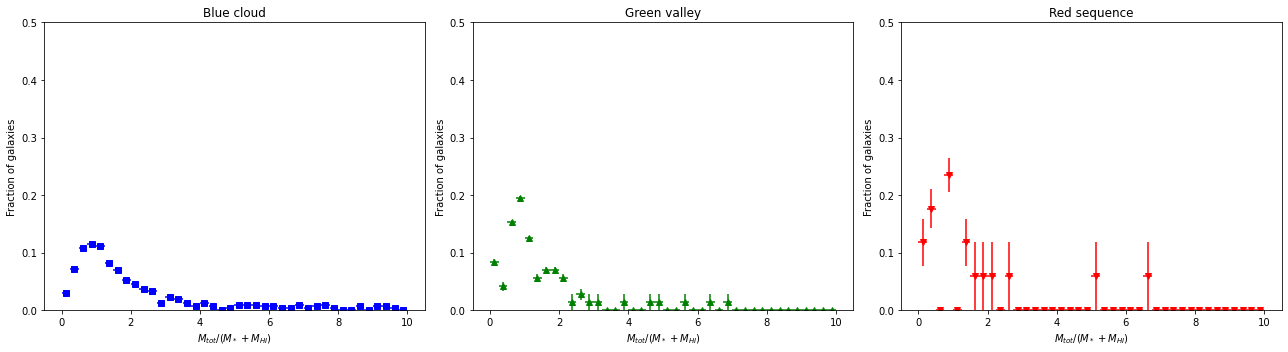

In [29]:
plt.figure(figsize=(18,5))

################################################################################
# Blue cloud
#-------------------------------------------------------------------------------
plt.subplot(131)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, BC_MtotMvis_binned, 
             xerr=0.5*mass_bin_width, yerr=BC_MtotMvis_err, fmt='bs')

plt.ylim(0,0.5)

plt.xlabel('$M_{tot}/(M_* + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Blue cloud')
################################################################################


################################################################################
# Green valley
#-------------------------------------------------------------------------------
plt.subplot(132)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, GV_MtotMvis_binned, 
             xerr=0.5*mass_bin_width, yerr=GV_MtotMvis_err, fmt='g^')

plt.ylim(0,0.5)

plt.xlabel('$M_{tot}/(M_* + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Green valley')
################################################################################


################################################################################
# Red sequence
#-------------------------------------------------------------------------------
plt.subplot(133)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, RS_MtotMvis_binned, 
             xerr=0.5*mass_bin_width, yerr=RS_MtotMvis_err, fmt='rv')

plt.ylim(0,0.5)

plt.xlabel('$M_{tot}/(M_* + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Red sequence')
################################################################################

plt.tight_layout();

# Relationship between $M_r$ and the mass ratios

In [14]:
Mr_bins = np.linspace(-22.5, -17.5, 13)
Mr_bin_width = Mr_bins[1] - Mr_bins[0]

Mstar_medians, Mstar_errs = bin_median(good_galaxies, 'rabsmag', Mr_bins, 'Mtot_Mstar_ratio')
MstarNSA_medians, MstarNSA_errs = bin_median(good_galaxies, 'rabsmag', Mr_bins, 'Mtot_MstarNSA_ratio')
MstarHI_medians, MstarHI_errs = bin_median(goodHI_galaxies, 'rabsmag', Mr_bins, 'Mtot_MstarHI_ratio')
MstarNSAHI_medians, MstarNSAHI_errs = bin_median(goodHI_galaxies, 'rabsmag', Mr_bins, 'Mtot_MstarNSAHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


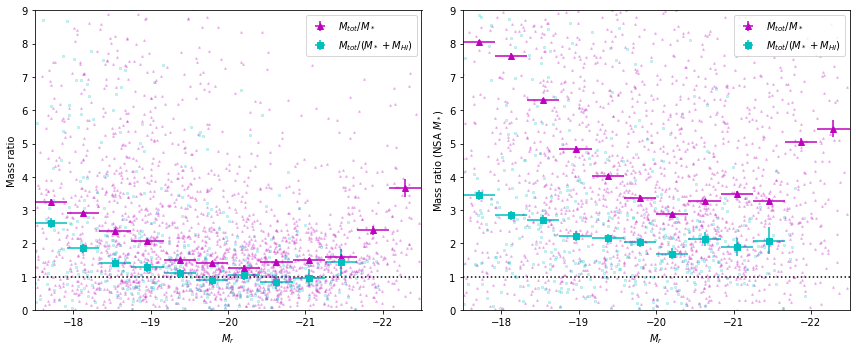

In [15]:
plt.figure(figsize=(12,5))

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.subplot(121)
plt.hlines(1, -22.5, -17.5, colors='k', linestyle=':')

plt.plot(good_galaxies['rabsmag'], good_galaxies['Mtot_Mstar_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['rabsmag'], goodHI_galaxies['Mtot_MstarHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Mr_bins + 0.5*Mr_bin_width, Mstar_medians, 
             xerr=0.5*Mr_bin_width, yerr=Mstar_errs, 
             c='m', fmt='^', label='$M_{tot}/M_*$')
plt.errorbar(Mr_bins + 0.5*Mr_bin_width, MstarHI_medians, 
             xerr=0.5*Mr_bin_width, yerr=MstarHI_errs, 
             c='c', fmt='s', label='$M_{tot}/(M_* + M_{HI})$')

plt.xlabel('$M_r$')
plt.ylabel('Mass ratio')

plt.xlim([-17.5,-22.5])
plt.ylim([0,9])

plt.legend()
################################################################################


################################################################################
# NSA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.hlines(1, -22.5, -17.5, colors='k', linestyle=':')

plt.plot(good_galaxies['rabsmag'], good_galaxies['Mtot_MstarNSA_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['rabsmag'], goodHI_galaxies['Mtot_MstarNSAHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Mr_bins + 0.5*Mr_bin_width, MstarNSA_medians, 
             xerr=0.5*Mr_bin_width, yerr=MstarNSA_errs, 
             c='m', fmt='^', label='$M_{tot}/M_*$')
plt.errorbar(Mr_bins + 0.5*Mr_bin_width, MstarNSAHI_medians, 
             xerr=0.5*Mr_bin_width, yerr=MstarNSAHI_errs, 
             c='c', fmt='s', label='$M_{tot}/(M_* + M_{HI})$')

plt.xlabel('$M_r$')
plt.ylabel('Mass ratio (NSA $M_*$)')

plt.xlim([-17.5,-22.5])
plt.ylim([0,9])

plt.legend()
################################################################################
plt.tight_layout();

# Relationship between metallicity and mass ratios

In [16]:
Z_bins = np.linspace(8.5, 10.5, 13)
Z_bin_width = Z_bins[1] - Z_bins[0]

ZMstar_medians, ZMstar_errs = bin_median(good_galaxies, 'Z12logOH', Z_bins, 'Mtot_Mstar_ratio')
ZMstarNSA_medians, ZMstarNSA_errs = bin_median(good_galaxies, 'Z12logOH', Z_bins, 'Mtot_MstarNSA_ratio')
ZMstarHI_medians, ZMstarHI_errs = bin_median(goodHI_galaxies, 'Z12logOH', Z_bins, 'Mtot_MstarHI_ratio')
ZMstarNSAHI_medians, ZMstarNSAHI_errs = bin_median(goodHI_galaxies, 'Z12logOH', Z_bins, 'Mtot_MstarNSAHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


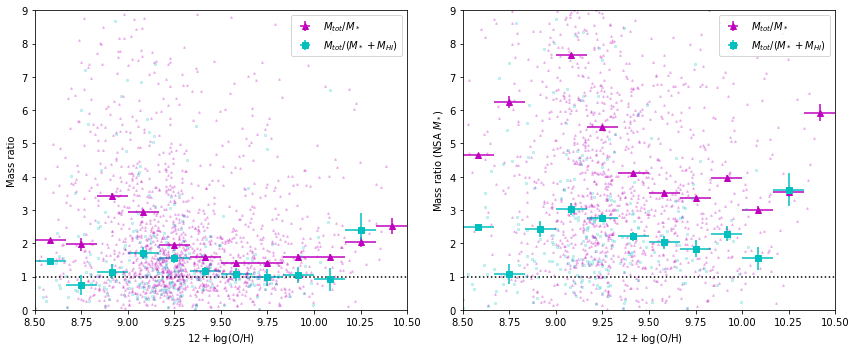

In [17]:
plt.figure(figsize=(12,5))

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.subplot(121)
plt.hlines(1, 8.5, 10.5, colors='k', linestyle=':')

plt.plot(good_galaxies['Z12logOH'], good_galaxies['Mtot_Mstar_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['Z12logOH'], goodHI_galaxies['Mtot_MstarHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMstar_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMstar_errs, 
             c='m', fmt='^', label='$M_{tot}/M_*$')
plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMstarHI_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMstarHI_errs, 
             c='c', fmt='s', label='$M_{tot}/(M_* + M_{HI})$')

plt.xlabel('$12 + \log$(O/H)')
plt.ylabel('Mass ratio')

plt.xlim([8.5,10.5])
plt.ylim([0,9])

plt.legend()
################################################################################


################################################################################
# NSA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.hlines(1, 8.5, 10.5, colors='k', linestyle=':')

plt.plot(good_galaxies['Z12logOH'], good_galaxies['Mtot_MstarNSA_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['Z12logOH'], goodHI_galaxies['Mtot_MstarNSAHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMstarNSA_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMstarNSA_errs, 
             c='m', fmt='^', label='$M_{tot}/M_*$')
plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMstarNSAHI_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMstarNSAHI_errs, 
             c='c', fmt='s', label='$M_{tot}/(M_* + M_{HI})$')

plt.xlabel('$12 + \log$(O/H)')
plt.ylabel('Mass ratio (NSA $M_*$)')

plt.xlim([8.5,10.5])
plt.ylim([0,9])

plt.legend()
################################################################################
plt.tight_layout();

# Relationship between $M_r$, metallicity, and mass ratio

In [23]:
def bin2D_median(data, bin1_quantity, bin2_quantity, bins1, bins2, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity1 and bin_quantity2.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin1_quantity, bin2_quantity : string
        Name of columns in data by which to bin the data
        
    bins1, bins2 : ndarray of shape (n,)
        Arrays of bin edges (arrays do not need to be the same length)
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,m)
        Median values of median_quantity for each bin of bin1_quantity and bin2_quantity
    '''
    
    if bin1_quantity in ['Mstar', 'NSA_Mstar']:
        bin1_indices = np.digitize(np.log10(data[bin1_quantity]), bins1)
    else:
        bin1_indices = np.digitize(data[bin1_quantity], bins1)
    
    if bin2_quantity in ['Mstar', 'NSA_Mstar']:
        bin2_indices = np.digitize(np.log10(data[bin2_quantity]), bins2)
    else:
        bin2_indices = np.digitize(data[bin2_quantity], bins2)
    
    n1_bins = len(bins1)
    n2_bins = len(bins2)
    
    binned_median = np.zeros((n1_bins, n2_bins))
    
    for i in range(n1_bins):
        for j in range(n2_bins):
            # Find galaxies in this bin
            gal_in_bin = np.logical_and(bin1_indices == i, bin2_indices == j)

            # Calculate median of galaxies in bin
            if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot']:
                binned_median[i,j] = np.log10(np.median(data[median_quantity][gal_in_bin]))
            else:
                binned_median[i,j] = np.median(data[median_quantity][gal_in_bin])
        
    return binned_median

In [27]:
Mr_bins2d = np.linspace(-22.5, -17.5, 5)
Z_bins2d = np.linspace(8.5, 10.5, 5)

MtotMstar_median = bin2D_median(good_galaxies, 
                                'rabsmag', 'Z12logOH', 
                                Mr_bins2d, Z_bins2d, 
                                'Mtot_Mstar_ratio')
MtotMstarNSA_median = bin2D_median(good_galaxies, 
                                   'rabsmag', 'Z12logOH', 
                                   Mr_bins2d, Z_bins2d, 
                                   'Mtot_MstarNSA_ratio')

MtotMHI_median = bin2D_median(goodHI_galaxies, 
                              'rabsmag', 'Z12logOH', 
                              Mr_bins2d, Z_bins2d, 
                              'Mtot_MstarHI_ratio')
MtotMHINSA_median = bin2D_median(goodHI_galaxies, 
                                 'rabsmag', 'Z12logOH', 
                                 Mr_bins2d, Z_bins2d, 
                                 'Mtot_MstarNSAHI_ratio')

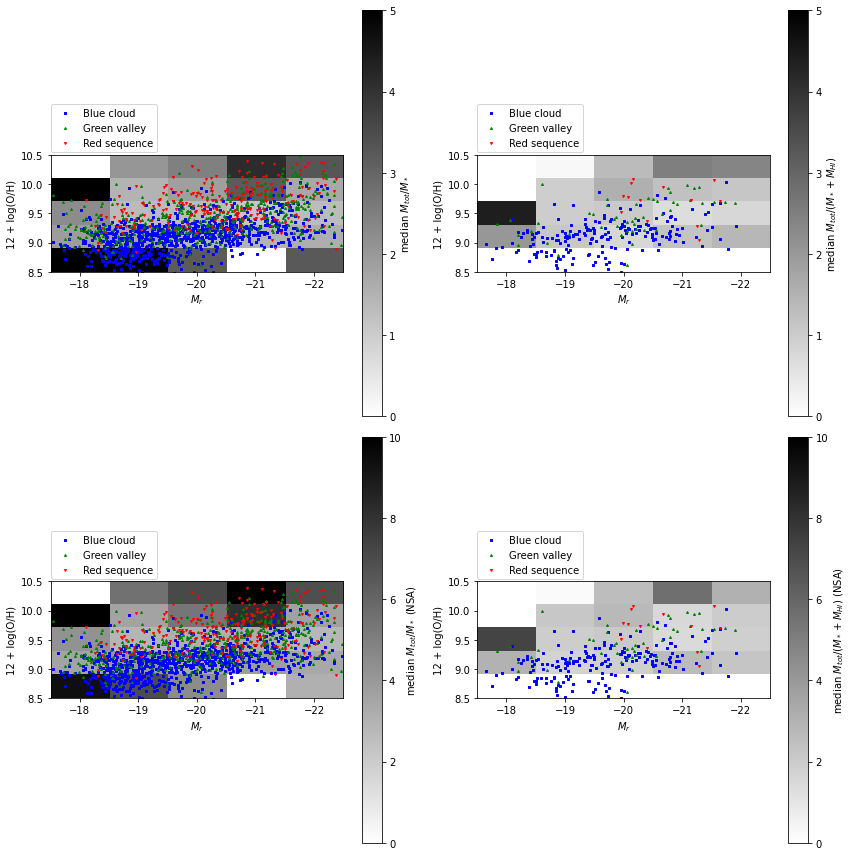

In [53]:
plt.figure(figsize=(12,12))

################################################################################
# Mtot/M* with MaNGA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(221)

plt.imshow(MtotMstar_median, cmap='gray_r', vmin=0, vmax=5,
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC['rabsmag'], BC['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV['rabsmag'], GV['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS['rabsmag'], RS['Z12logOH'], 'rv', markersize=2, label='Red sequence')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{tot}/M_*$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* with NSA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(223)

plt.imshow(MtotMstarNSA_median, cmap='gray_r', vmin=0, vmax=10,
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC['rabsmag'], BC['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV['rabsmag'], GV['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS['rabsmag'], RS['Z12logOH'], 'rv', markersize=2, label='Red sequence')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{tot}/M_*$ (NSA)')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) with MaNGA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(222)

plt.imshow(MtotMHI_median, cmap='gray_r', vmin=0, vmax=5,
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC_HI['rabsmag'], BC_HI['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV_HI['rabsmag'], GV_HI['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS_HI['rabsmag'], RS_HI['Z12logOH'], 'rv', markersize=2, label='Red sequence')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{tot}/(M_* + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) with NSA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(224)

plt.imshow(MtotMHINSA_median, cmap='gray_r', vmin=0, vmax=10,
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC_HI['rabsmag'], BC_HI['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV_HI['rabsmag'], GV_HI['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS_HI['rabsmag'], RS_HI['Z12logOH'], 'rv', markersize=2, label='Red sequence')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{tot}/(M_* + M_{HI})$ (NSA)')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)

plt.tight_layout();

In [11]:
good_galaxies

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r_NSA,frac_masked_spaxels,smoothness_score,Rmax,CMD_class,SFR,sSFR,Mstar_turn,logHI,WF50,WP20,cd,u_r,NSA_elpetro_th50_r_arcsec,Mtot_Mstar_ratio,Mtot_MstarNSA_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8466,6101,1438,139,53054,294037,168.0940308708338,44.81603706485203,0.6000820994377136,22.0548095703125,0.12233314663171768,144223535104.0,-9.0,567.6364805898224,19.56532865739719,3.7566680003856714,6.226519589171837,60.64886528392808,955.4887393285356,6.114502608794207,37.40734111759261,23620086.30845526,1278.508617880521,170.41472631209842,85.17178611967988,2.06998636427238,8.108006100985879,504.4690204586246,0.08372113108634949,0.00163589562924352,1465250607990.9382,101008699104.46594,1165420381925.9556,101008699104.46594,299830226064.98267,3.8869342735090764,0.3368863120643953,-22.167272567749023,2.222540734829384,0.9052416703695635,3.5560651757270096,83213.36579644644,4.073890901917203,5.079662165112862,-99.0,-99.0,2.0,0,1,8.664123611989726,182.64408826864585,72.06700292266065,1238750,-99.0,2.598399519920349,0.08690404345202173,2.15120792325884,19.55835846649855,3,-0.61041659116745,-12.068939208984375,13508705856.754303,-99.0,-99.0,-99.0,-0.044,2.878,3.40315,4.886934273509077,10.159580452208038
10001,12704,483,456,51924,59044,133.98996686918764,57.677967666915094,0.15000000596046448,81.21926879882812,0.014121513813734055,4286639360.0,2.0,137.40109221820367,12.019966006803603,2.437456670238318,0.62369405484111,11.050976916546706,180.47561021779072,115.89057001718085,1.3014816973706926,1.2686003493530886,56.6700499965809,114.46159813992365,2.0014082548135246,11.175891372801216,5.199922090067767,33.71801070757104,0.04750613123178482,0.00122847675844281,14415047865.039877,2522081650.974506,6819910091.50451,2522081650.974506,7595137773.535367,0.8979310573230055,0.3320652931092958,-18.730289459228516,2.4024271092773875,0.12921426806521052,2.6215646236389056,0.7663223099845403,2.2425706595157324,0.0626184318795791,-99.0,-99.0,-99.0,0,0,0.8500751474266697,4.359234615121608,2.5936931313516185,-1,-99.0,2.1984682977199554,0.2559453032104637,1.4387059747053537,3.2839520528476394,-1,-99.0,-99.0,369094006.78510773,-99.0,-99.0,-99.0,-99.0,-99.0,16.0734,1.8979310573230055,3.3627853090584874
8466,3704,1365,395,53062,271835,169.51344705905626,45.11302884764515,0.7605966925621033,38.829132080078125,0.10723754018545151,197521702912.0,-9.0,622.1887707904054,26.970961071825585,5.423760452377873,2.5702486813838723,29.428355841944573,703.0027912676525,7.337108317597004,110.70109746869997,278249229.126889,107.87212427790995,549.2620009008702,154.618499801253,8.764829605005158,62.61144944358716,287.7697521802383,0.19382250308990479,0.00374262968525048,1262606938003.0842,109464282599.71619,928713420701.6368,109464282599.71619,333893517301.4474,2.7814658643497148,0.3278418924824141,-22.550582885742188,6.147730083472918,0.449